In [ ]:
# Importation des librairies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances, homogeneity_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Étape 1: Chargement du dataset

In [ ]:
dataset = pd.read_csv("./Fichiers de données/UNSW_NB15_training-set.csv")

In [ ]:
dataset

# Étape 2: Prétraitement des données

In [ ]:
# Nature des données
dataset.info()

In [ ]:
# Nettoyage des données
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

In [ ]:
# Normalisation des données numériques
scaler = StandardScaler()
numeric_features = dataset.select_dtypes(include=['float64', 'int64']).columns
X_scaled = scaler.fit_transform(dataset[numeric_features])

In [ ]:
dataset.info()

# Etape 3: Sélection des caractéristiques pertinentes

In [ ]:
selected_features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean']
X = X_scaled[selected_features]

# Étape 4: Clustering par densité

In [ ]:
dbscan_model = DBSCAN(eps=0.7, min_samples=10)

In [ ]:
pred_model = dbscan_model.fit_predict(X_scaled)

In [ ]:
print("Score de silhouette: ", silhouette_score(X_scaled, pred_model))

In [ ]:
# Calcul du dendrogramme pour visualiser la structure hiérarchique des clusters
linked = linkage(X_scaled, method='complete', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked,distance_sort='descending')
plt.title('Dendrogramme des clusters')
plt.xlabel('Échantillons')
plt.show()

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Normalisation des données numériques
scaler = StandardScaler()
numeric_features = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

# Étape 2: Sélection des caractéristiques pertinentes
X = dataset[selected_features]

# Étape 3: Application de l'algorithme DBSCAN
epsilon = 0.7
min_samples = 10
dbscan_model = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters_dbscan = dbscan_model.fit_predict(X)

# Étape 4: Évaluation du clustering avec le score de silhouette
silhouette_avg_dbscan = silhouette_score(X, clusters_dbscan)
print("Score de silhouette pour DBSCAN:", silhouette_avg_dbscan)

anomalies_dbscan = X[clusters_dbscan == -1]
print("Points de données considérés comme des anomalies avec DBSCAN:", anomalies_dbscan)



Score de silhouette pour DBSCAN: 0.33375896520035386
Points de données considérés comme des anomalies avec DBSCAN:             dur     spkts     dpkts    sbytes    dbytes      rate     sloss  \
227    6.482613 -0.109520 -0.151816 -0.045525 -0.087369 -0.554509 -0.027126   
228    5.984346 -0.109520 -0.151816 -0.045525 -0.087369 -0.554509 -0.027126   
229    6.323438 -0.109520 -0.151816 -0.045525 -0.087369 -0.554509 -0.027126   
230    6.323438 -0.109520 -0.151816 -0.045525 -0.087369 -0.554509 -0.027126   
231    5.606124 -0.109520 -0.151816 -0.045525 -0.087369 -0.554509 -0.027126   
...         ...       ...       ...       ...       ...       ...       ...   
81962  0.188307 -0.094586 -0.134511 -0.040759 -0.086801 -0.554485 -0.042594   
81973  0.131128 -0.094586 -0.134511 -0.040759 -0.086801 -0.554480 -0.042594   
82085 -0.099141 -0.064716 -0.099901 -0.043462 -0.085599 -0.554322 -0.042594   
82087 -0.099141 -0.064716 -0.099901 -0.043462 -0.085599 -0.554322 -0.042594   
82092 -0.040343 

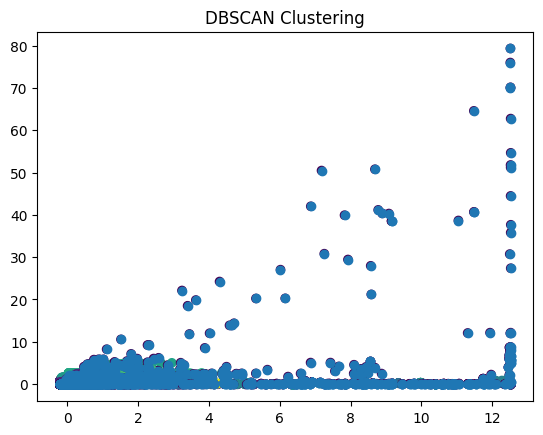

In [17]:
# Visualisation des résultats
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_dbscan)
plt.scatter(anomalies_dbscan.iloc[:,  0], anomalies_dbscan.iloc[:, 1])
plt.title('DBSCAN Clustering')
plt.show()